In [95]:
# implementing k means clustering on iot based attacks dataset
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [96]:
# importing the dataset
df = pd.read_csv("part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0.0,0.0,0.0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0.0,1.0,0.0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238687 entries, 0 to 238686
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    238687 non-null  float64
 1   Header_Length    238687 non-null  float64
 2   Protocol Type    238687 non-null  float64
 3   Duration         238687 non-null  float64
 4   Rate             238687 non-null  float64
 5   Srate            238687 non-null  float64
 6   Drate            238687 non-null  float64
 7   fin_flag_number  238687 non-null  float64
 8   syn_flag_number  238687 non-null  float64
 9   rst_flag_number  238687 non-null  float64
 10  psh_flag_number  238687 non-null  float64
 11  ack_flag_number  238687 non-null  float64
 12  ece_flag_number  238687 non-null  float64
 13  cwr_flag_number  238687 non-null  float64
 14  ack_count        238687 non-null  float64
 15  syn_count        238687 non-null  float64
 16  fin_count        238687 non-null  floa

In [98]:
# lets remove columns that we dont need.
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [99]:
df.drop(
    columns=[
        "Drate",
        "fin_flag_number",
        "syn_flag_number",
        "rst_flag_number",
        "psh_flag_number",
        "ack_flag_number",
        "ece_flag_number",
        "cwr_flag_number",
        "ack_count",
        "syn_count",
        "fin_count",
        "urg_count",
        "rst_count",
        "HTTP",
        "HTTPS",
        "DNS",
        "Telnet",
        "SMTP",
        "SSH",
        "IRC",
        "TCP",
        "UDP",
        "DHCP",
        "ARP",
        "ICMP",
        "IPv",
        "LLC",
        "Tot sum",
        "Min",
        "Max",
        "AVG",
        "Std",
        "Tot size",
        "IAT",
        "Number",
        "Magnitue",
        "Radius",
        "Covariance",
        "Variance",
        "Weight",
    ],
    inplace=True,
)

In [100]:
# let us now visualize scatter plots of the data
import seaborn as sns

# before that lets scale the data down, just take the first 1000 rows
scaled_df = df[:1000]

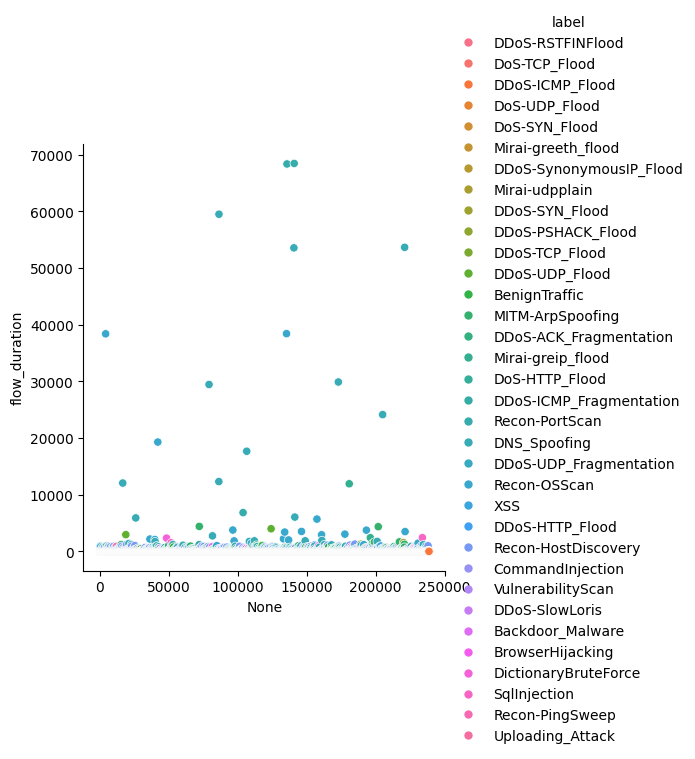

In [101]:
sns.relplot(df, y="flow_duration", x=df.index, kind="scatter", hue="label")

In [102]:
# lets go through the dataset, and remove those rows with labels that occur very less times to remove noise

df["label"].value_counts()

label
DDoS-ICMP_Flood            36554
DDoS-UDP_Flood             27626
DDoS-TCP_Flood             23149
DDoS-PSHACK_Flood          21210
DDoS-SYN_Flood             20739
DDoS-RSTFINFlood           20669
DDoS-SynonymousIP_Flood    18189
DoS-UDP_Flood              16957
DoS-TCP_Flood              13630
DoS-SYN_Flood              10275
BenignTraffic               5600
Mirai-greeth_flood          5016
Mirai-udpplain              4661
Mirai-greip_flood           3758
DDoS-ICMP_Fragmentation     2377
MITM-ArpSpoofing            1614
DDoS-ACK_Fragmentation      1505
DDoS-UDP_Fragmentation      1484
DNS_Spoofing                 925
Recon-HostDiscovery          697
Recon-OSScan                 517
Recon-PortScan               430
DoS-HTTP_Flood               414
VulnerabilityScan            210
DDoS-HTTP_Flood              169
DDoS-SlowLoris               106
DictionaryBruteForce          63
SqlInjection                  31
BrowserHijacking              30
CommandInjection              28
Back

In [103]:
# lets keep the top 5 labels and remove the rest
top_labels = df["label"].value_counts().head(5).index
df = df[df["label"].isin(top_labels)]

In [104]:
df.shape

(129278, 7)

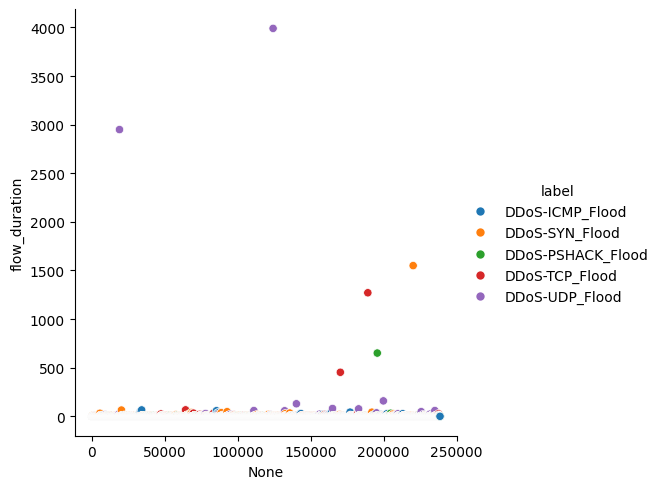

In [105]:
# lets try plotting again
sns.relplot(df, y="flow_duration", x=df.index, kind="scatter", hue="label")

In [127]:
# lets remove flow_duration rows with z scores more than 3
from scipy import stats

z = np.abs(stats.zscore(df["flow_duration"]))
non_outlier_df = df[(z < 0.0115)]
non_outlier_df.shape

(34489, 7)

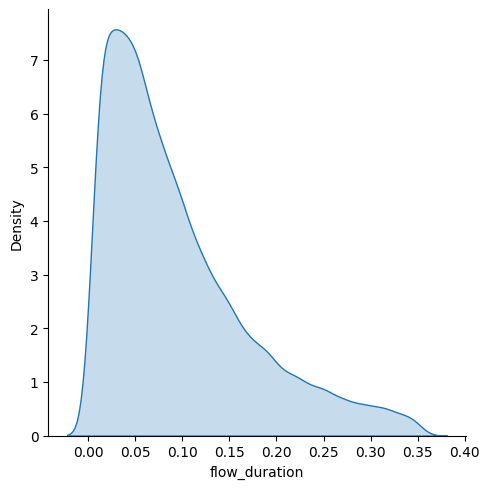

In [128]:
# lets plot a distribution
sns.displot(non_outlier_df["flow_duration"], kind="kde", fill=True)

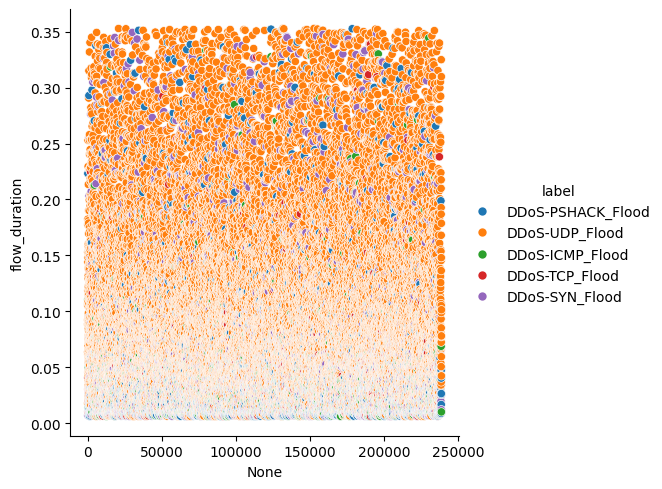

In [129]:
# lets try plotting again
sns.relplot(
    non_outlier_df,
    y="flow_duration",
    x=non_outlier_df.index,
    kind="scatter",
    hue="label",
)

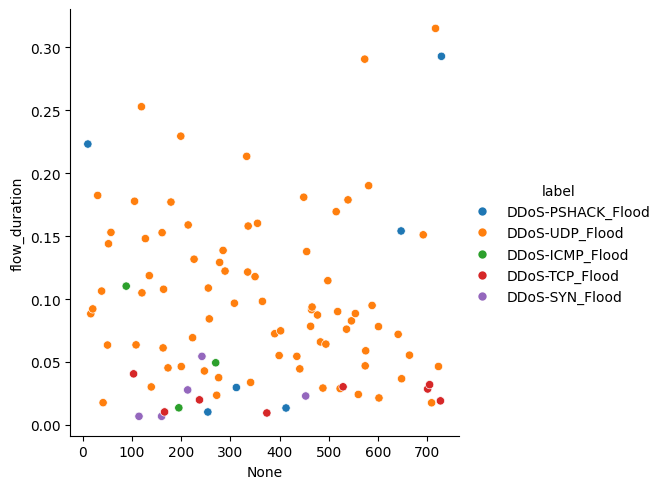

In [131]:
# lets now try with only 1000 rows
scaled_df = non_outlier_df[:100]

# lets plot
sns.relplot(
    scaled_df, y="flow_duration", x=scaled_df.index, kind="scatter", hue="label"
)

In [135]:
# we still cant see a nice cluster here, lets try and remove ddos udp flood
scaled_df = non_outlier_df[non_outlier_df["label"] != "DDoS-UDP_Flood"]

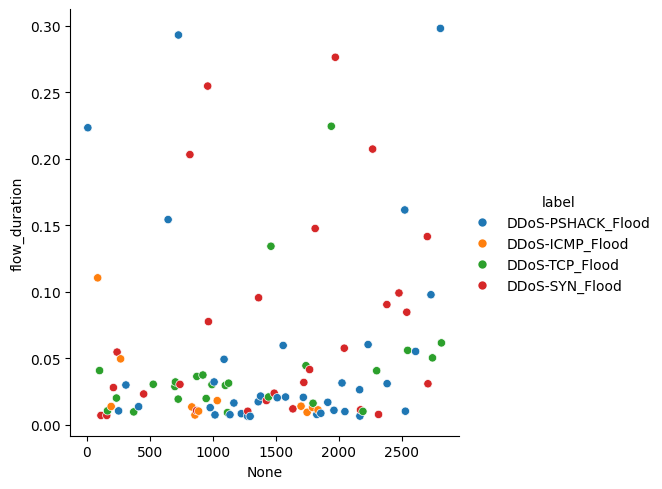

In [138]:
# lets plot again
scaled_df = scaled_df[:100]
sns.relplot(
    scaled_df, y="flow_duration", x=scaled_df.index, kind="scatter", hue="label"
)

In [139]:
# lets try other features
df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,label
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,DDoS-ICMP_Flood
9,0.000000,54.20,6.00,64.00,11.243547,11.243547,DDoS-SYN_Flood
10,0.223192,61.54,6.11,64.64,9.087882,9.087882,DDoS-PSHACK_Flood
11,0.000000,54.00,6.00,64.00,17.333181,17.333181,DDoS-TCP_Flood
12,0.000000,0.00,1.00,75.46,0.000000,0.000000,DDoS-ICMP_Flood


In [141]:
# lets plot rate just like flow_duration
df.shape

(129278, 7)

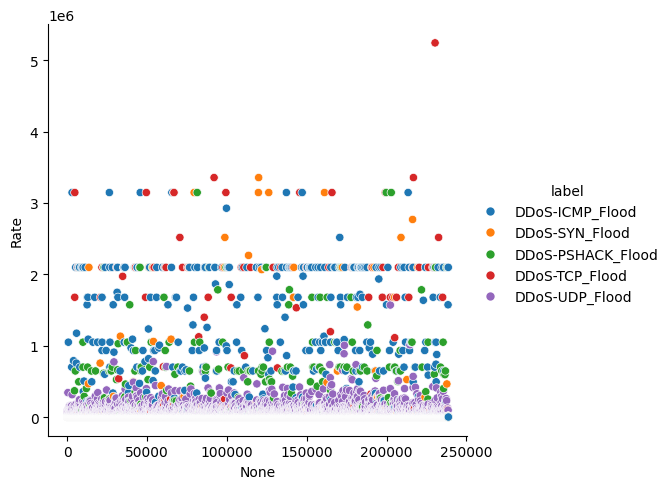

In [143]:
sns.relplot(df, y="Rate", x=df.index, kind="scatter", hue="label")

Text(49.60998958333333, 0.5, 'Rate')

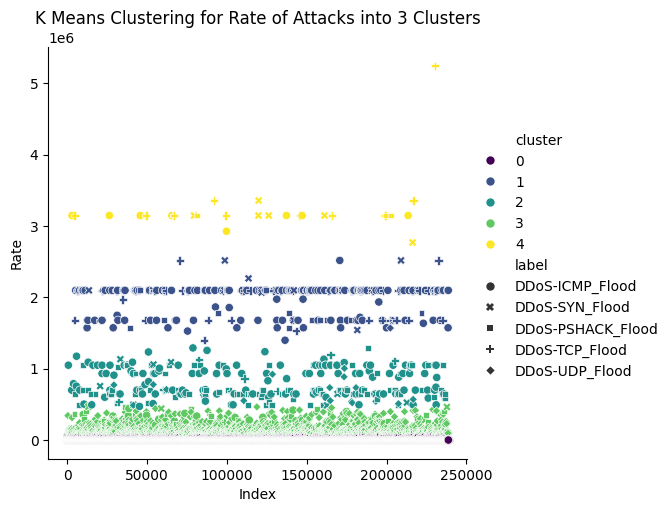

In [154]:
# its not great but there are some clusters, we can try here.
# lets try implementing k means

# lets try with 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[["Rate"]])

# lets get the labels
df["cluster"] = kmeans.labels_

# lets plot
sns.relplot(
    df,
    y="Rate",
    x=df.index,
    kind="scatter",
    hue="cluster",
    palette="viridis",
    legend="full",
    style="label",
)

# titles
plt.title("K Means Clustering for Rate of Attacks into 3 Clusters")
plt.xlabel("Index")
plt.ylabel("Rate")

Text(49.60998958333333, 0.5, 'Rate')

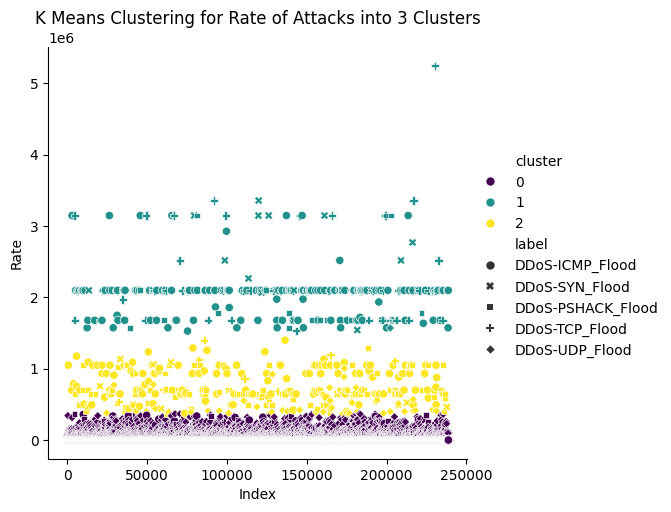

In [153]:
# lets try with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[["Rate"]])

# lets get the labels
df["cluster"] = kmeans.labels_

# lets plot
sns.relplot(
    df,
    y="Rate",
    x=df.index,
    kind="scatter",
    hue="cluster",
    palette="viridis",
    legend="full",
    style="label",
)

# titles
plt.title("K Means Clustering for Rate of Attacks into 3 Clusters")
plt.xlabel("Index")
plt.ylabel("Rate")

C:\Users\Krishnaraj\AppData\Local\Temp\ipykernel_43912\3087714870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df["cluster"] = kmeans.labels_


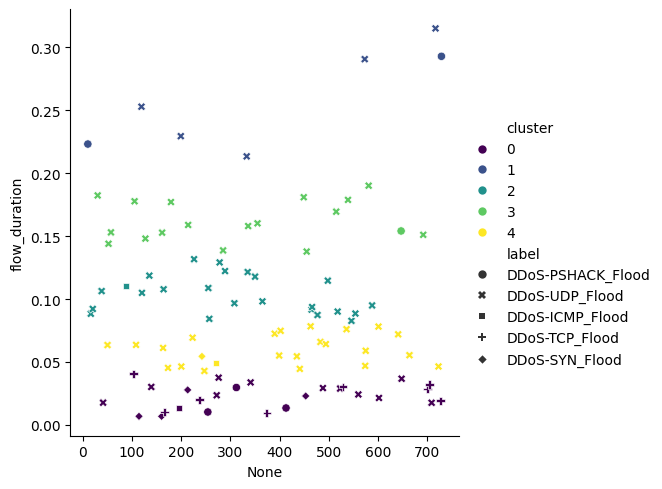

In [156]:
scaled_df = non_outlier_df[:100]

# we could also try it on flow_duration
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_df[["flow_duration"]])

# lets get the labels
scaled_df["cluster"] = kmeans.labels_

# lets plot
sns.relplot(
    scaled_df,
    y="flow_duration",
    x=scaled_df.index,
    kind="scatter",
    hue="cluster",
    palette="viridis",
    legend="full",
    style="label",
)

In [157]:
# so that concludes our k means clustering analysis on features of an IOT dataset.

In [159]:
# credits to https://www.unb.ca/cic/datasets/iotdataset-2022.html for the dataset
# Citation: Sajjad Dadkhah, Hassan Mahdikhani, Priscilla Kyei Danso, Alireza Zohourian, Kevin Anh Truong, Ali A. Ghorbani, “Towards the development of a realistic multidimensional IoT profiling dataset”, Submitted to: The 19th Annual International Conference on Privacy, Security & Trust (PST2022) August 22-24, 2022, Fredericton, Canada.

# analysis by: Krishnaraj T